In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
dat=pd.read_csv("train.csv")
print(dat)


       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
5                       4         88.944468             57.795044   
6                       4         88.944468             57.682296   
7                       4         76.517718             57.175142   
8                       4         76.517718             56.808817   
9                       4         76.517718             56.442492   
10                      4         76.517718             55.709843   
11                      5        111.273574             63.713457   
12                      5         92.729214             58.201829   
13                      5         

In [11]:
features=pd.DataFrame(dat,columns=dat.columns)
target=pd.DataFrame(dat.critical_temp,columns=['critical_temp'])
features

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.906070,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.906070,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.906070,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.906070,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.906070,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.906070,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.00
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.906070,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.00
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.906070,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.00
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.906070,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.00
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.906070,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.00


In [15]:
cor=dat.corr()
#print(cor)
print(abs(cor['critical_temp']).sort_values())

gmean_fie                          0.025103
entropy_ThermalConductivity        0.085862
mean_fie                           0.102268
mean_atomic_radius                 0.105273
wtd_gmean_ElectronAffinity         0.107359
wtd_mean_ElectronAffinity          0.111516
mean_atomic_mass                   0.113523
std_Density                        0.115243
wtd_entropy_ThermalConductivity    0.116728
range_FusionHeat                   0.140714
range_Valence                      0.143546
gmean_atomic_radius                0.143770
wtd_range_ElectronAffinity         0.185348
mean_ElectronAffinity              0.193550
wtd_std_FusionHeat                 0.195571
std_FusionHeat                     0.201310
wtd_std_Density                    0.207663
std_Valence                        0.208072
gmean_atomic_mass                  0.230345
wtd_entropy_ElectronAffinity       0.237648
range_Density                      0.260536
std_ElectronAffinity               0.262103
range_ElectronAffinity          

In [17]:
x=dat["wtd_entropy_atomic_mass"]
y=dat["critical_temp"]
z=dat["std_ThermalConductivity"]

In [18]:
x1=np.array((x-x.min())/(x.max()-x.min()))

In [19]:
x2=np.array((z-z.min())/(z.max()-z.min()))

In [20]:
y=np.array((y-y.min())/(y.max()-y.min()))

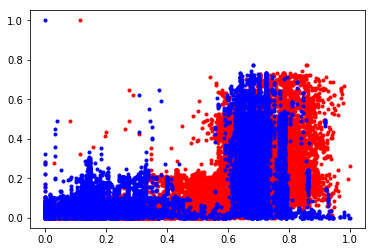

In [23]:
plt.plot(x1,y,"r.",x2,y,"b.")


In [24]:
x1_train,x1_test,x2_train,x2_test,y_train,y_test=train_test_split(x1,x2,y,test_size=0.2)

In [25]:
x1_train.size

17010

In [26]:
def hypothesis(a,x1,b,x2,c):
    return a*x1+b*x2+c

In [27]:
def error(a,b,c,x1,x2,y):
    err=0
    m=len(x1)
    
    for i in range(m):
        err+=np.power(hypothesis(a,x1[i],b,x2[i],c)-y[i],2)
        
    return (1/(2*m))*err

In [28]:
def step_gradient(a,b,c,x1,x2,y,learning_rate):
    grad_a=0
    grad_b=0
    grad_c=0
    m=len(x1)
    
    for i in range(m):
        grad_a=(1/m)*(hypothesis(a,x1[i],b,x2[i],c)-y[i])*x1[i]
        grad_b=(1/m)*(hypothesis(a,x1[i],b,x2[i],c)-y[i])*x2[i]
        grad_c=(1/m)*(hypothesis(a,x1[i],b,x2[i],c)-y[i])
        
    a=a-grad_a*learning_rate
    b=b-grad_b*learning_rate
    c=c-grad_c*learning_rate
    
    return a,b,c

In [29]:
def descend(init_a,init_b,init_c,x1,x2,y,learning_rate,iterations):
    a=init_a
    b=init_b
    c=init_c
       
    for i in range(iterations):
        e=error(a,b,c,x1,x2,y)
    
        if i%1000 == 0:
            print(f"Error:{np.sqrt(e)},a:{a},b:{b},c:{c}")
    
        a,b,c=step_gradient(a,b,c,x1,x2,y,learning_rate)
    
    return a,b,c

In [31]:
a = 0.14328373087679214
b = 0.0312320775675062
c = 0.29864129051356914
learning_rate = 0.3
iterations = 8000

In [32]:
final_a, final_b, final_c = descend(a, b, c, x1_train, x2_train, y_train, learning_rate, iterations)

Error:0.18535724677874127,a:0.14328373087679214,b:0.0312320775675062,c:0.29864129051356914
Error:0.17981966320055306,a:0.13973933171779798,b:0.026124370425819533,c:0.2918187288973048
Error:0.17463720254419965,a:0.13630752621476425,b:0.02117891798369074,c:0.28521289714721143
Error:0.16980277612374273,a:0.13298473764543298,b:0.016390565954313915,c:0.27881691048341856
Error:0.16530896068944503,a:0.1297675029079981,b:0.011754323785262272,c:0.2726241028323836
Error:0.16114792627816166,a:0.12665246891176685,b:0.007265359457196738,c:0.2666280198793332
Error:0.15731137245580434,a:0.12363638908247371,b:0.0029189944478023146,c:0.26082241234139214
Error:0.153790476061345,a:0.12071611997861387,b:-0.0012893011442967305,c:0.2552012294544125


In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x1_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(x1_test)
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(x1_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(x1_test, y_test))

ValueError: Expected 2D array, got 1D array instead:
array=[0.06021269 0.68810216 0.3520694  ... 0.34992999 0.5460759  0.51951149].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

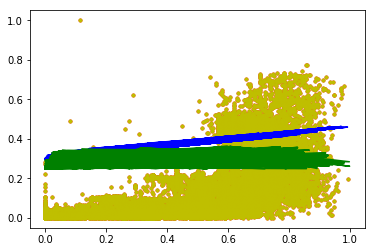

In [34]:
plt.plot(x1_train,y_train,"r.",x1_train,y_train,"y.",x1_train,hypothesis(a,x1_train,b,x2_train,c),"b",x2_train,
         hypothesis(final_a,x1_train,final_b,x2_train,final_c),"g")

In [3]:
# Separating out the features
X = dat.iloc[:, :81]
# Seprating out the target
y = dat.iloc[:,81:]
X.head()


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809


In [4]:
y.head()

,critical_temp
0,29.0
1,26.0
2,19.0
3,22.0
4,23.0


In [5]:
y.tail()

,critical_temp
21258,2.44
21259,122.10
21260,1.98
21261,1.84
21262,12.80


In [6]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

C:\Users\Mithun\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mithun\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.0800575 ,  0.04673292, -0.45165095, ..., -0.40616628,
        -0.83837245, -0.52006971],
       [ 0.6147436 ,  0.17426938, -0.43207104, ..., -0.36235194,
        -0.42686578, -0.45082134],
       [-0.0800575 ,  0.04673292, -0.45097762, ..., -0.37695672,
        -0.83837245, -0.50330427],
       ...,
       [-1.46965972,  0.40792698,  0.67545689, ...,  1.75534096,
        -0.7001588 , -0.60141582],
       [-1.46965972,  0.40792698,  0.71984372, ...,  0.7432298 ,
        -0.7001588 , -0.46423977],
       [-0.77485861, -0.0030091 ,  0.41416385, ...,  0.32407265,
         1.18612097,  1.81314381]])

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(X)
principalComponents


array([[-3.66448679e+00,  9.91642689e-01,  3.04525969e+00, ...,
         3.99456991e-02, -3.89648413e-02,  3.30833502e-02],
       [-4.55546842e+00, -2.14584743e-01,  1.72287252e+00, ...,
         4.33515498e-02,  1.38914539e-01,  2.55720196e-01],
       [-3.48817626e+00,  1.05516726e+00,  3.13082075e+00, ...,
         4.28146609e-02, -5.78710917e-02,  1.86376670e-02],
       ...,
       [ 1.04774618e+01, -9.31942974e-01,  1.57264038e+00, ...,
         4.94298023e-02,  2.75647897e-02, -3.40280332e-02],
       [ 9.77188538e+00, -1.00134503e+00,  1.21560162e+00, ...,
         2.50171923e-02, -6.76139912e-03,  7.23212544e-03],
       [ 3.91560139e+00,  1.44638502e+00, -1.91616716e+00, ...,
        -1.53532247e-01, -1.71097971e-02, -5.57767615e-02]])

In [8]:
#pca.explained_variance_ratio_.cumsum()
pca.explained_variance_ratio_

array([3.89317982e-01, 1.04822088e-01, 9.52120001e-02, 7.90773008e-02,
       5.88218289e-02, 3.78836850e-02, 3.62225141e-02, 3.10710704e-02,
       2.36111258e-02, 1.97787961e-02, 1.82836690e-02, 1.45859739e-02,
       1.17844636e-02, 9.98553996e-03, 9.82476180e-03, 7.81519491e-03,
       7.18792707e-03, 5.43466303e-03, 4.83327429e-03, 3.81676544e-03,
       3.02273402e-03, 2.86551931e-03, 2.56483087e-03, 2.07111321e-03,
       1.97217790e-03, 1.86288155e-03, 1.70037886e-03, 1.42592696e-03,
       1.26293775e-03, 1.15126820e-03, 1.02409524e-03, 9.60418058e-04,
       9.19262047e-04, 7.18768361e-04, 6.84926194e-04, 6.20909894e-04,
       5.70768972e-04, 4.92969125e-04, 4.36838347e-04, 4.22680890e-04,
       3.26131323e-04, 3.06014082e-04, 2.56984719e-04, 2.37421684e-04,
       2.23533308e-04, 2.15365626e-04, 1.96482515e-04, 1.87566803e-04,
       1.80759121e-04, 1.75189949e-04])

In [9]:
pca.explained_variance_ratio_.cumsum()


array([0.38931798, 0.49414007, 0.58935207, 0.66842937, 0.7272512 ,
       0.76513489, 0.8013574 , 0.83242847, 0.8560396 , 0.87581839,
       0.89410206, 0.90868803, 0.9204725 , 0.93045804, 0.9402828 ,
       0.94809799, 0.95528592, 0.96072059, 0.96555386, 0.96937062,
       0.97239336, 0.97525888, 0.97782371, 0.97989482, 0.981867  ,
       0.98372988, 0.98543026, 0.98685619, 0.98811913, 0.98927039,
       0.99029449, 0.99125491, 0.99217417, 0.99289294, 0.99357786,
       0.99419877, 0.99476954, 0.99526251, 0.99569935, 0.99612203,
       0.99644816, 0.99675418, 0.99701116, 0.99724858, 0.99747212,
       0.99768748, 0.99788396, 0.99807153, 0.99825229, 0.99842748])

In [10]:
from sklearn.model_selection import train_test_split
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size = 0.20, random_state = 21)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((17010, 50), (4253, 50), (17010, 1), (4253, 1))

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

DT = DecisionTreeRegressor (max_depth=11)
# Your code here
# DTClassifier.fit (# Your code here, # Your code here)
#Hint: 
#DT.fit (X_test, y_test)  
DT.fit(X_train,y_train)
#DT.fit(principalComponents,y)

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

DT = DecisionTreeRegressor (max_depth=11)
# Your code here
# DTClassifier.fit (# Your code here, # Your code here)
#Hint: 
DT.fit (X_test, y_test)  
#DT.fit(X_train,y_train)
#DT.fit(principalComponents,y)

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [13]:
#predicted_labels = DT.predict(X_test)
#predicted_labels = DT.predict(principalComponents)
predicted_labels = DT.predict(X_train)
predicted_labels

array([21.        ,  7.543125  ,  8.        , ..., 75.78443548,
        7.21666667,  7.97912   ])

In [15]:
predicted_labels.shape

(17010,)

In [16]:
predicted_labels1 = DT.predict(X_test)
predicted_labels1

array([80.01223404, 55.91      , 25.11242553, ...,  7.97912   ,
       61.75      , 30.        ])

In [17]:
predicted_labels1.shape

(4253,)

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#rms = sqrt(mean_squared_error(y_test, predicted_labels))
#rms = sqrt(mean_squared_error(y, predicted_labels))
rms = sqrt(mean_squared_error(y_train, predicted_labels))
rms

16.953914170653107

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms1 = sqrt(mean_squared_error(y_test, predicted_labels1))
#rms = sqrt(mean_squared_error(y, predicted_labels))
#rms = sqrt(mean_squared_error(y_train, predicted_labels))
rms1

8.040859382815713

In [56]:
import numpy as np
def mean_absolute_per_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [75]:
mean_absolute_per_error(X_train,y_train)

195775.85343479982

In [25]:
DT.score(X_train,y_train)


0.7552742198071558

In [26]:
DT.score(X_test,y_test)


0.9446475410775544